<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Suavizacion_Exponencial_Holt_Winter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col=['date'])
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


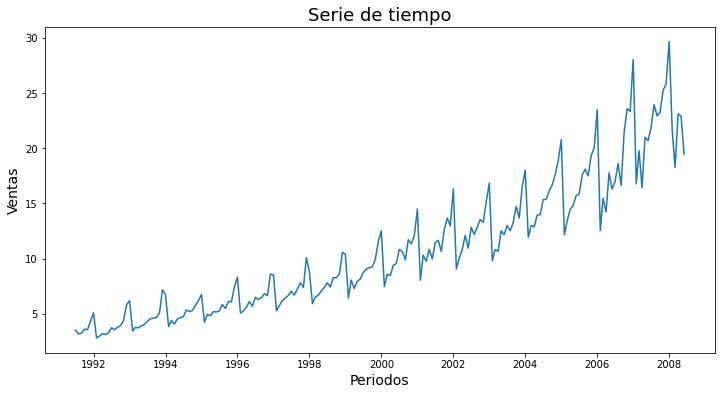

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])

plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Serie de tiempo', fontsize=18)
plt.show()

# Suavizacion Exponencial - Metodo de Holt

In [ ]:
m_es = SimpleExpSmoothing(df['value']).fit(optimized=True)
df['ES'] = m_es.fittedvalues
pred_es = m_es.forecast(30)
expo_s = pd.concat([df['ES'], pred_es])

m_holt = Holt(df['value']).fit(optimized=True)
df['Holt'] = m_holt.fittedvalues
pred_holt = m_holt.forecast(30)
expo_holt = pd.concat([df['Holt'], pred_holt])


In [ ]:
# Error 
print('MSE ES: ', MSE(df['value'], df['ES']))
print('MAPE ES: ', MAPE(df['value'], df['ES']))

print('MSE Holt: ', MSE(df['value'], df['Holt']))
print('MAPE Holt: ', MAPE(df['value'], df['Holt']))



MSE ES:  4.0249553701764595
MAPE ES:  0.13194172339228902
MSE Holt:  3.799293229615546
MAPE Holt:  0.1256614196956147


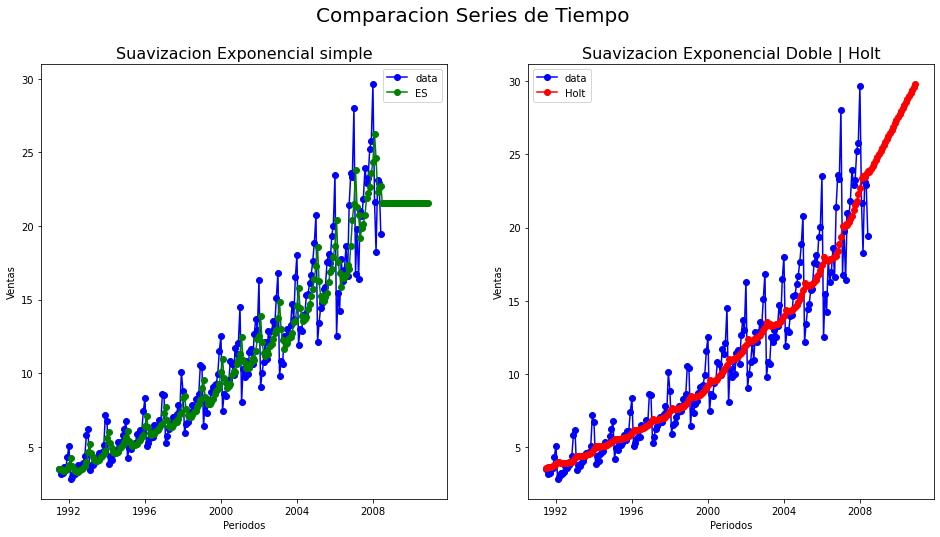

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparacion Series de Tiempo', fontsize=20)

ax1.plot(df.index, df['value'], '-o', color='blue', label='data')
ax1.plot(expo_s, '-o', color='green', label='ES')
ax1.set_title('Suavizacion Exponencial simple', fontsize=16)
ax1.set(xlabel='Periodos', ylabel='Ventas')
ax1.legend(loc='best')

ax2.plot(df.index, df['value'], '-o', color='blue', label='data')
ax2.plot(expo_holt, '-o', color='red', label='Holt')
ax2.set_title('Suavizacion Exponencial Doble | Holt', fontsize=16)
ax2.set(xlabel='Periodos', ylabel='Ventas')
ax2.legend(loc='best')

plt.show()

# Suavizacion Exponencial Holt-Winter

## Determinar la extacionalidad

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

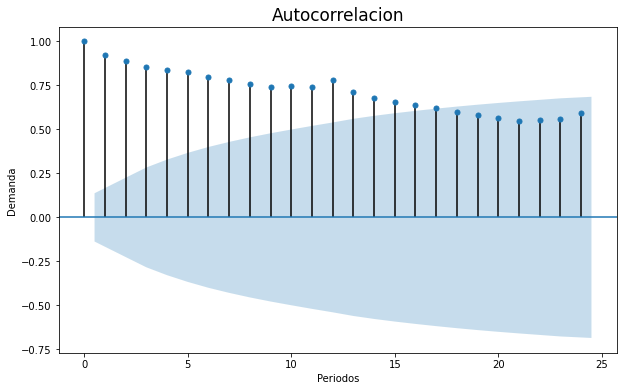

In [ ]:
# En la figura se puede obserba

plt.rc('figure', figsize=(10, 6))
plot_acf(df['value'].values, fft=1)

plt.title('Autocorrelacion', fontsize=17)
plt.xlabel('Periodos')
plt.ylabel('Demanda')

plt.show()

In [ ]:
m_w = ExponentialSmoothing(df['value'], seasonal_periods=12, trend='add', seasonal='add').fit(optimized=True)
df['Winter'] = m_w.fittedvalues
pred_w = m_w.forecast(30)
expo_w = pd.concat([df['Winter'], pred_w])

In [ ]:
m_w.params_formatted

,name,param,optimized
smoothing_level,alpha,0.152120,True
smoothing_slope,beta,0.046689,True
smoothing_seasonal,gamma,0.468725,True
initial_level,l.0,9.721648,True
initial_slope,b.0,0.052806,True
initial_seasons.0,s.0,-6.452958,True
initial_seasons.1,s.1,-6.630718,True
initial_seasons.2,s.2,-6.599556,True
initial_seasons.3,s.3,-6.381314,True
initial_seasons.4,s.4,-6.259779,True


In [ ]:
# Error 
print('MSE ES: ', MSE(df['value'], df['ES']))
print('MAPE ES: ', MAPE(df['value'], df['ES']))

print('MSE Holt: ', MSE(df['value'], df['Holt']))
print('MAPE Holt: ', MAPE(df['value'], df['Holt']))

print('MSE winter: ', MSE(df['value'], df['Winter']))
print('MAPE winter: ', MAPE(df['value'], df['Winter']))


MSE ES:  4.0249553701764595
MAPE ES:  0.13194172339228902
MSE Holt:  3.799293229615546
MAPE Holt:  0.1256614196956147
MSE winter:  0.8424796196495659
MAPE winter:  0.05018432215370698


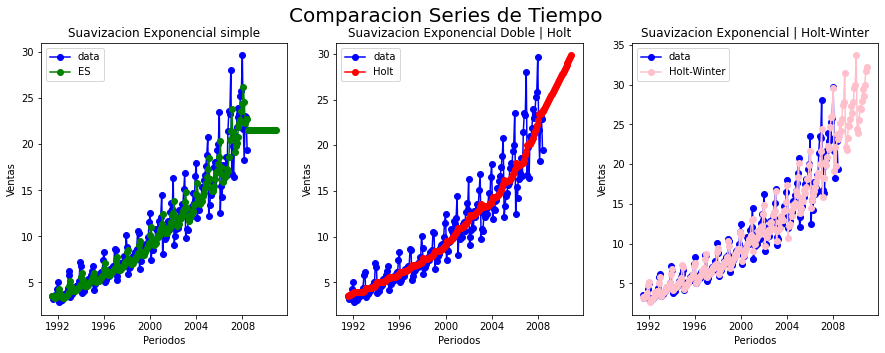

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparacion Series de Tiempo', fontsize=20)

ax1.plot(df.index, df['value'], '-o', color='blue', label='data')
ax1.plot(expo_s, '-o', color='green', label='ES')
ax1.set_title('Suavizacion Exponencial simple', fontsize=12)
ax1.set(xlabel='Periodos', ylabel='Ventas')
ax1.legend(loc='best')

ax2.plot(df.index, df['value'], '-o', color='blue', label='data')
ax2.plot(expo_holt, '-o', color='red', label='Holt')
ax2.set_title('Suavizacion Exponencial Doble | Holt', fontsize=12)
ax2.set(xlabel='Periodos', ylabel='Ventas')
ax2.legend(loc='best')

ax3.plot(df.index, df['value'], '-o', color='blue', label='data')
ax3.plot(expo_w, '-o', color='pink', label='Holt-Winter')
ax3.set_title('Suavizacion Exponencial | Holt-Winter', fontsize=12)
ax3.set(xlabel='Periodos', ylabel='Ventas')
ax3.legend(loc='best')


plt.show()

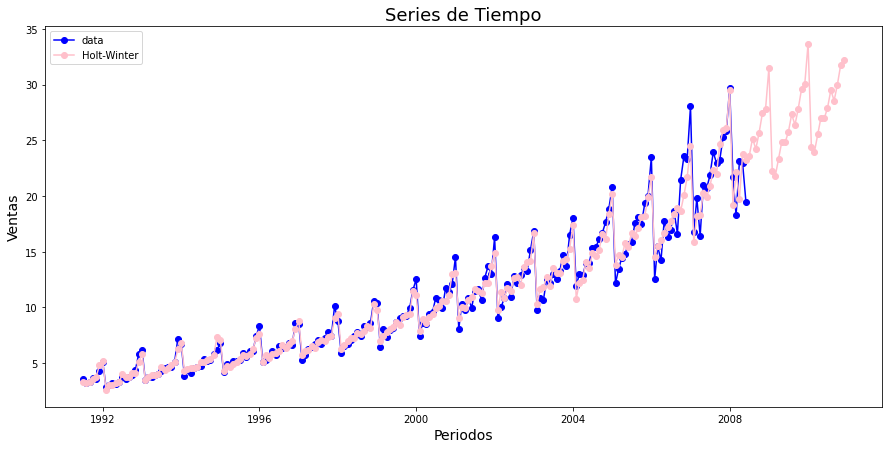

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['value'], '-o', color='blue', label='data')
plt.plot(expo_w, '-o', color='pink', label='Holt-Winter')

plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.title('Series de Tiempo', fontsize=18)
plt.legend(loc='best')

plt.show()